#Handling missing values in Dataset

In [70]:
import seaborn as sns

In [71]:
df=sns.load_dataset("titanic")
#df=data_frame ()varibale assigned by user

In [72]:
df.shape

(891, 15)

In [73]:
df.isnull()
#TRUE- means missing values

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False
887,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,True,False,False,False,False,False,False,False,True,False,False,False
889,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [74]:
df.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [75]:
#Take deck column(688 missing values in deck out of 891)
nan_deck=df["deck"].value_counts(dropna=False)
#dropna() method removes the rows that contains NULL values.
#(dropna=False) means Not Dropping the null values
nan_deck

NaN    688
C       59
B       47
D       33
E       32
A       15
F       13
G        4
Name: deck, dtype: int64

203 Missing values on summing the above

In [76]:
#threshold condition; to drop the attribute(i.e column) which has missing value more than the threshold value
df_threshold=df.dropna(axis=1,thresh=500)
#dropna() method removes the rows that contains NULL values.
#axix=1 means column
df_threshold.columns
#gives the columns which have not crossed the threshold value

Index(['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare',
       'embarked', 'class', 'who', 'adult_male', 'embark_town', 'alive',
       'alone'],
      dtype='object')

note: deck is not mentiond bcoz deck has more than 500 missing values.

In [77]:
df_age=df.dropna(subset=["age"],how="any",axis=0)
##dropna() method removes the rows that contains NULL values.
#axis=0 means ROWS; 
len(df_age)
#Length reduced from 891 to 741

714

In [78]:
mean_age=df["age"].mean()
mean_age
###median can also be used

29.69911764705882

In [79]:
median_age=df["age"].median()
median_age

28.0

<Axes: >

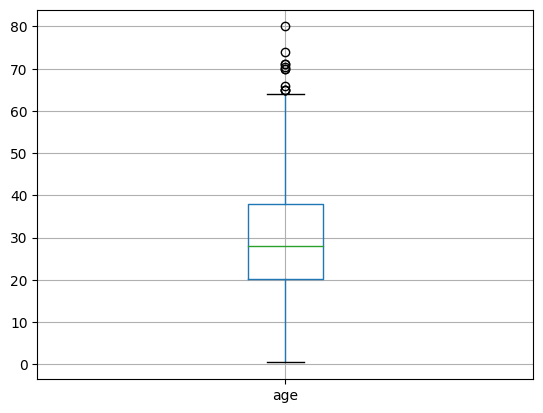

In [80]:
df.boxplot(column="age")

note there is not much difference in mean and median.

but median is preferred over mean in presence of outliers.

-In the above box plot it is clear that there are very less outliers and compared to no. of observation ==> mean and median
are close values.

In [81]:
#NOW 
#fill the missing values with mean_age in "age" column
df["age"].fillna(mean_age,inplace=True)

In [82]:
df.isnull().sum()

survived         0
pclass           0
sex              0
age              0
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

NO missing values in Age column.

In [83]:
## Missing value in emabrk_town is 4
df.dtypes

survived          int64
pclass            int64
sex              object
age             float64
sibsp             int64
parch             int64
fare            float64
embarked         object
class          category
who              object
adult_male         bool
deck           category
embark_town      object
alive            object
alone              bool
dtype: object

embar_town is object type --> use mode

In [88]:
mode_embark=df["embark_town"].value_counts(dropna=True).idxmax()
mode_embark

'Southampton'

In [89]:
df["embark_town"].fillna(mode_embark,inplace=True)

In [90]:
df.isnull().sum()

survived         0
pclass           0
sex              0
age              0
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      0
alive            0
alone            0
dtype: int64

In [91]:
### Replace th missing data with the mode (ANOTHER METHOD)
df["embarked"].fillna(method="ffill",inplace=True)
##ffill means forward fill

In [93]:
df.isnull().sum()

survived         0
pclass           0
sex              0
age              0
sibsp            0
parch            0
fare             0
embarked         0
class            0
who              0
adult_male       0
deck           688
embark_town      0
alive            0
alone            0
dtype: int64

In [94]:
##the deck column has lots of missing values so it's better to drop that column

df.drop("deck",axis=1,inplace=True)
df.isnull().sum()

survived       0
pclass         0
sex            0
age            0
sibsp          0
parch          0
fare           0
embarked       0
class          0
who            0
adult_male     0
embark_town    0
alive          0
alone          0
dtype: int64

SO there are no missing values in DATA SET